<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Deep_Learning_Assignments/blob/main/Assignment_3/Jax_neural_network_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 layer Neural network for non-linear regression from scratch using Jax

Plotting 2d non linear cubic equation data. Weights as 5,2

n denotes number of input data points

d denotes dimension

x is the set random n number of points generated in d dimensions

calculating actual values of y as y_true using x, actuals weights and bias

plotting x and y

In [ ]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

Using jax to generate 200 random data points for x and calculate y 

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


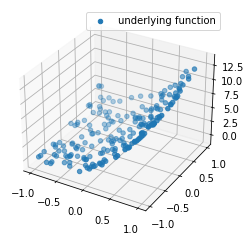

In [ ]:
n = 200
d = 2
key = random.PRNGKey(0)
x = random.uniform(key, (n, d), minval=-1, maxval=1)

weights_true = jnp.array([[5, 2],]).T
bias_true = jnp.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Using Gradient descent and mean sum of square errors to calculate the loss and gradient, to update the weights and bias such that loss is minized

In [ ]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return jnp.mean((y_pred - y_true) ** 2)
    
    def backward(self):
      n = self.y_true.shape[0]
      self.gradient = 2. * (self.y_pred - self.y_true) / n
      # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
      return self.gradient

#loss = MSE()

#def update_params(params, x, y, lr):
#    grads = grad(loss)(params, x, y)
#    return [(param - lr * grad_param) for param, grad_param in zip(params, grads)]

First the weights and bias are initialized to a random value

Then calculate output by multiplying input with weights and adding bias

In backward function, the weights gradient and bias gradient are calculated based on the gradient values calculated

The weights and bias values are then updated in the update method

In [ ]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    key = random.PRNGKey(0)
    #x = random.uniform(key, (n, d), minval=-1, maxval=1)
    self.weights = random.uniform(key, (input_dim, num_hidden)) * jnp.sqrt(2. / input_dim)
    self.bias = jnp.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
from typing import Callable

def fit(x: jnp.ndarray, y: jnp.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Training with linear function

Using the linear function to train the non-linear data results in the loss being high, because the linear function is incapable of representing the this data

Epoch 0, loss 22.36227035522461
Epoch 1, loss 17.22962188720703
Epoch 2, loss 13.679753303527832
Epoch 3, loss 11.179418563842773
Epoch 4, loss 9.382391929626465
Epoch 5, loss 8.06276798248291
Epoch 6, loss 7.07221794128418
Epoch 7, loss 6.31256628036499
Epoch 8, loss 5.718175411224365
Epoch 9, loss 5.244612693786621
Epoch 10, loss 4.861350059509277
Epoch 11, loss 4.547048091888428
Epoch 12, loss 4.286494255065918
Epoch 13, loss 4.06861686706543
Epoch 14, loss 3.885174512863159
Epoch 15, loss 3.729902505874634
Epoch 16, loss 3.59793758392334
Epoch 17, loss 3.485429525375366
Epoch 18, loss 3.3892838954925537
Epoch 19, loss 3.306974172592163
Epoch 20, loss 3.2364137172698975
Epoch 21, loss 3.1758646965026855
Epoch 22, loss 3.1238677501678467
Epoch 23, loss 3.0791893005371094
Epoch 24, loss 3.040782928466797
Epoch 25, loss 3.007758140563965
Epoch 26, loss 2.979353189468384
Epoch 27, loss 2.9549179077148438
Epoch 28, loss 2.933894395828247
Epoch 29, loss 2.915804386138916
Epoch 30, loss 2.

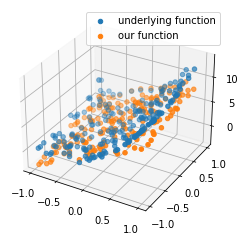

In [ ]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

Introducing non-linearity in the neural network with a non-linear activation function - Relu. This enables the network to model complex relationships between input and output variables.

Without non-linear function, the output of each neuron would be a linear combination of the input variables - results in linear model - limitation in representing complex patterns in data

Some non-linear functions used : sigmoid, ReLU, Tanh. 
Model complex relationships between input and output variables and learn more complex patterns in data

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = jnp.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      #to debug 
      #import pdb
      #pdb.set_trace() 
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


#relu = Relu()
#input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
#print(relu(input_))
#print(relu.backward(input_))

Performing just one step of:
- forward pass
- backward propagation

5.5205283


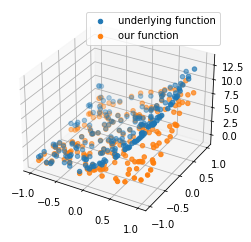

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden1, num_hidden2):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hidden2, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 20, 20)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

Neural network for non-linear Regression

Activation function : Relu

Layers in neural network:

Input layer -> Hidden layer 1(20 neurons) -> Hidden layer 2(20 neurons) -> Output layers

Number of epochs : 100

Epoch 0, loss 5.520528316497803
Epoch 1, loss 5.076713562011719
Epoch 2, loss 4.686609268188477
Epoch 3, loss 4.3478312492370605
Epoch 4, loss 4.053112506866455
Epoch 5, loss 3.794825553894043
Epoch 6, loss 3.5696306228637695
Epoch 7, loss 3.3715667724609375
Epoch 8, loss 3.1964662075042725
Epoch 9, loss 3.0417840480804443
Epoch 10, loss 2.904313802719116
Epoch 11, loss 2.7802484035491943
Epoch 12, loss 2.66806960105896
Epoch 13, loss 2.566101551055908
Epoch 14, loss 2.4724433422088623
Epoch 15, loss 2.3850669860839844
Epoch 16, loss 2.303751230239868
Epoch 17, loss 2.2276229858398438
Epoch 18, loss 2.1556520462036133
Epoch 19, loss 2.087878465652466
Epoch 20, loss 2.023846387863159
Epoch 21, loss 1.9629937410354614
Epoch 22, loss 1.9053159952163696
Epoch 23, loss 1.8505382537841797
Epoch 24, loss 1.7983404397964478
Epoch 25, loss 1.7484716176986694
Epoch 26, loss 1.70074462890625
Epoch 27, loss 1.6551333665847778
Epoch 28, loss 1.6113537549972534
Epoch 29, loss 1.5691795349121094
Epoc

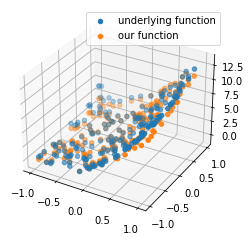

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=100)
plot_3d(x, y_true, model(x))